# PROBLEM

The National Basketball Association (NBA) is a professional basketball league in North America. The league comprises 30 teams (29 in the United States and 1 in Canada) and is one of the four major professional sports leagues in the United States and Canada. It is the premier men's professional basketball league in the world.

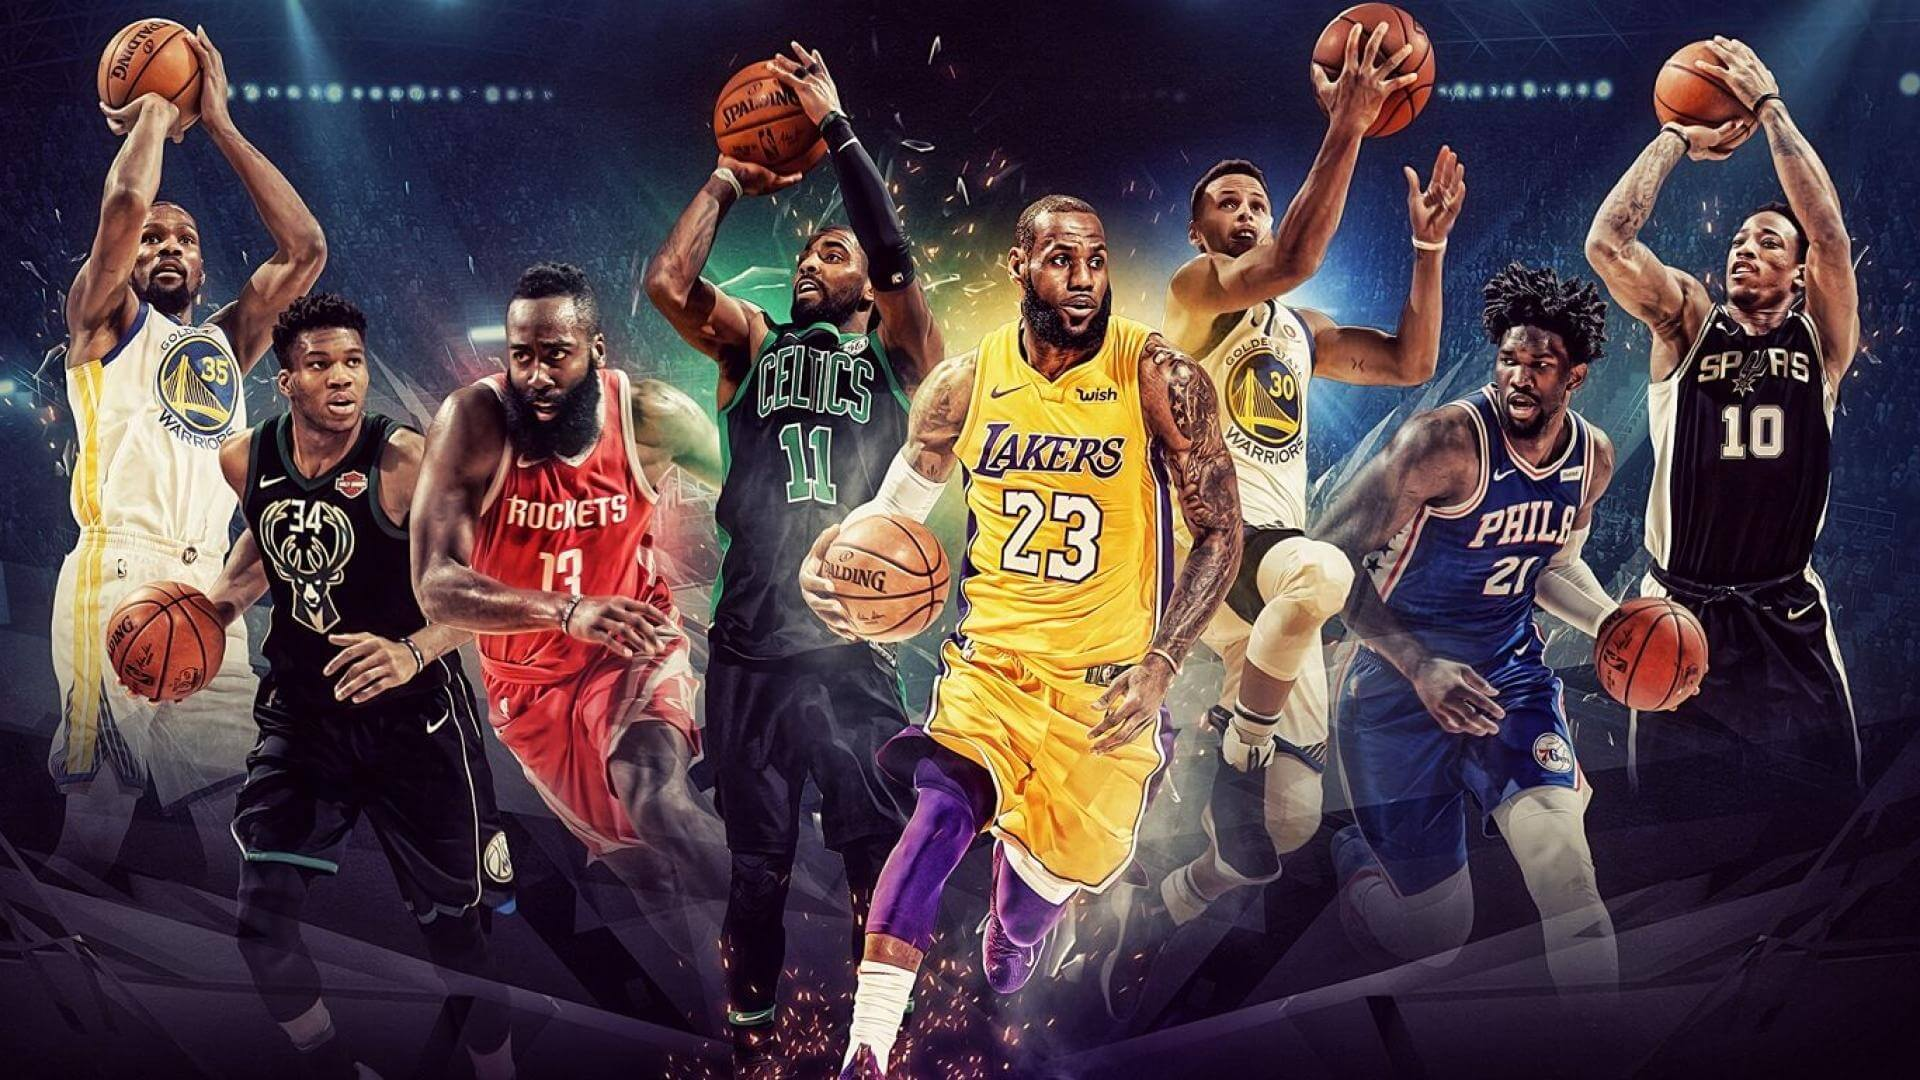

Career longevity is dependent on various factors for any player in all the games and so for NBA Rookies. The factors like games played, count of games played, and other statistics of the player during the game.

# DATA

GP: Games Played (here you might find some values in decimal, consider them to be the floor integer, for example, if the value is 12.789, the number of games played by the player is 12)

MIN:  Minutes Played

PTS: Number of points per game

FGM: Field goals made

FGA: Field goals attempt

FG%: field goals percent

3P Made: 3 point made

3PA: 3 points attempt

3P%: 3 point percent

FTM: Free throw made

FTA: Free throw attempts

FT%: Free throw percent

OREB: Offensive rebounds

DREB: Defensive rebounds

REB: Rebounds

AST: Assists

STL: Steals

BLK: Blocks

TOV: Turnovers

Target: 0 if career years played < 5, 1 if career years played >= 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler



from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
import xgboost as xgb
import lightgbm as lgbm

In [2]:
train = pd.read_csv("../input/data-world-nba-dataset/Train_data.csv")
test = pd.read_csv("../input/data-world-nba-dataset/Test_data.csv")

In [3]:
train.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [4]:
print("*"*30, "HEAD", "*"*30)
display(train.head(5))
print("*"*30, "SHAPE", "*"*30)
print(f"Rows: {train.shape[0]}\nColumns: {train.shape[1]}")
print("*"*30, "INFO", "*"*30)
display(train.info())
print("*"*30, "DESCRIBE", "*"*30)
display(train.describe().T)
print("*"*30, "NULL?", "*"*30)
display(train.isnull().sum())
print("*"*30, "DUPLICATED", "*"*30)
display(train.duplicated().sum())
print("*"*30, "EXPLAINING", "*"*30)

****************************** HEAD ******************************


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


****************************** SHAPE ******************************
Rows: 1101
Columns: 20
****************************** INFO ******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   float64
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK     

None

****************************** DESCRIBE ******************************


,count,mean,std,min,25%,50%,75%,max
GP,1101.0,59.008156,17.236886,11.0,46.223257,59.387147,76.000000,82.0
MIN,1101.0,16.928284,8.034209,3.1,10.492268,15.386486,21.830403,40.9
PTS,1101.0,6.502344,4.163856,1.1,3.587756,5.200000,8.300000,24.3
FGM,1101.0,2.511125,1.611502,0.4,1.400000,2.000000,3.200000,9.0
FGA,1101.0,5.645747,3.422292,1.0,3.200000,4.600000,6.900000,18.9
FG%,1101.0,43.912555,6.106910,25.0,40.000000,43.652785,47.700000,73.7
3P Made,1101.0,0.241959,0.363008,0.0,0.000000,0.100000,0.400000,2.3
3PA,1101.0,0.767455,1.017214,0.0,0.000000,0.300000,1.195634,6.5
3P%,1101.0,19.050425,15.513640,0.0,0.000000,22.600000,32.300000,100.0
FTM,1101.0,1.241914,0.937585,0.0,0.600000,1.000000,1.600000,7.5


****************************** NULL? ******************************


GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
Target     0
dtype: int64

****************************** DUPLICATED ******************************


7

****************************** EXPLAINING ******************************


#### We have Rows: 1101, Columns: 20
#### There is no null values
#### Data have 7 duplicated values, we need to drop them.


# DATA CLEANING

### Duplicates

In [5]:
#train.drop_duplicates(inplace=True)

### Dropping duplicates reduce the accuracy score. It must be like that but, I didn't use the drop_duplicates because of the challenge scores

# Preparing Data

In [6]:
X_train = train.drop(labels = ["Target"],axis=1)
y_train = train["Target"]
X_test = test

# SCALING

In [7]:
X_train = X_train.copy()
X_test = X_test.copy()

#Standard Scaler
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.fit_transform(X_test)

#Minmax Scaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.fit_transform(X_test)

#Normalization
X_train_normalize = preprocessing.normalize(X_train)
X_test_normalize = preprocessing.normalize(X_test)

train_list = [X_train,X_train_standard,X_train_minmax,X_train_normalize]
scaler_list = ["without_scaler","standard_scaler","minmax_scaler","normalize"]

# MODEL

In [8]:
kfold = StratifiedKFold(n_splits=10)
random_state = 6
z = 0
for i in train_list:
    logistic_model = LogisticRegression(solver='lbfgs', max_iter=400,random_state=random_state).fit(i,y_train)
    knn_model = KNeighborsClassifier().fit(i, y_train)
    decision_model = DecisionTreeClassifier(random_state=random_state).fit(i,y_train)
    mlp_model = MLPClassifier(random_state=random_state).fit(i, y_train)
    gaussian_model = GaussianNB().fit(i, y_train)
    linear_svm_model = SVC(kernel='linear').fit(i,y_train)
    adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state, learning_rate=0.1).fit(i,y_train)
    randomforest_model = RandomForestClassifier(random_state=random_state).fit(i,y_train)
    extra_model = ExtraTreesClassifier(random_state=random_state).fit(i,y_train)
    gb_model = GradientBoostingClassifier(random_state=random_state).fit(i,y_train)
    xgb_model = xgb.XGBClassifier().fit(i,y_train)
    lgbm_model = lgbm.LGBMClassifier().fit(i,y_train)

    model_names = ["Logistic","Knn","DecisionTree","MLP","GaussianNB","SupportVectorMachine","AdaBoost","RandomForest","ExtraTrees","GradientBoost","Xgboost","Lightgbm"]
    model_list = [logistic_model,knn_model,decision_model,mlp_model,gaussian_model,linear_svm_model,adaboost_model,randomforest_model,extra_model,gb_model,xgb_model,lgbm_model]
    results = []
    z +=1
    if z ==1:
        print("*"*30, f"{scaler_list[z-1]}","*"*30)
    if z ==2:
        print("*"*30, f"{scaler_list[z-1]}","*"*30)
    if z ==3:
        print("*"*30, f"{scaler_list[z-1]}","*"*30)
    if z ==4:
        print("*"*30, f"{scaler_list[z-1]}","*"*30)
    for j in model_list:
        result = cross_val_score(j, i, y_train, scoring = "accuracy", cv = 5, n_jobs=4)
        results.append(result.mean())

    acc_of_models = {"Model": model_names, "Mean Accuracy": results}    
    acc_of_models = pd.DataFrame(acc_of_models)
    display(acc_of_models)


****************************** without_scaler ******************************


,Model,Mean Accuracy
0,Logistic,0.696643
1,Knn,0.702991
2,DecisionTree,0.633089
3,MLP,0.681185
4,GaussianNB,0.673928
5,SupportVectorMachine,0.693920
6,AdaBoost,0.675804
7,RandomForest,0.737515
8,ExtraTrees,0.739321
9,GradientBoost,0.701164


****************************** standard_scaler ******************************


,Model,Mean Accuracy
0,Logistic,0.694825
1,Knn,0.690284
2,DecisionTree,0.631271
3,MLP,0.699346
4,GaussianNB,0.673928
5,SupportVectorMachine,0.692110
6,AdaBoost,0.675804
7,RandomForest,0.736610
8,ExtraTrees,0.739321
9,GradientBoost,0.702073


****************************** minmax_scaler ******************************


,Model,Mean Accuracy
0,Logistic,0.694805
1,Knn,0.670309
2,DecisionTree,0.633085
3,MLP,0.701172
4,GaussianNB,0.673928
5,SupportVectorMachine,0.689371
6,AdaBoost,0.675808
7,RandomForest,0.733887
8,ExtraTrees,0.739321
9,GradientBoost,0.702073


****************************** normalize ******************************


,Model,Mean Accuracy
0,Logistic,0.669367
1,Knn,0.686684
2,DecisionTree,0.663015
3,MLP,0.678449
4,GaussianNB,0.650321
5,SupportVectorMachine,0.670284
6,AdaBoost,0.650341
7,RandomForest,0.714813
8,ExtraTrees,0.714817
9,GradientBoost,0.693912


### Without_scaler, standard_scaler and minmax_scaler values are the same. In addition, normalize scaling is the worst case for this dataset.


Text(0.5, 1.0, 'Feature Importance in RandomForests')

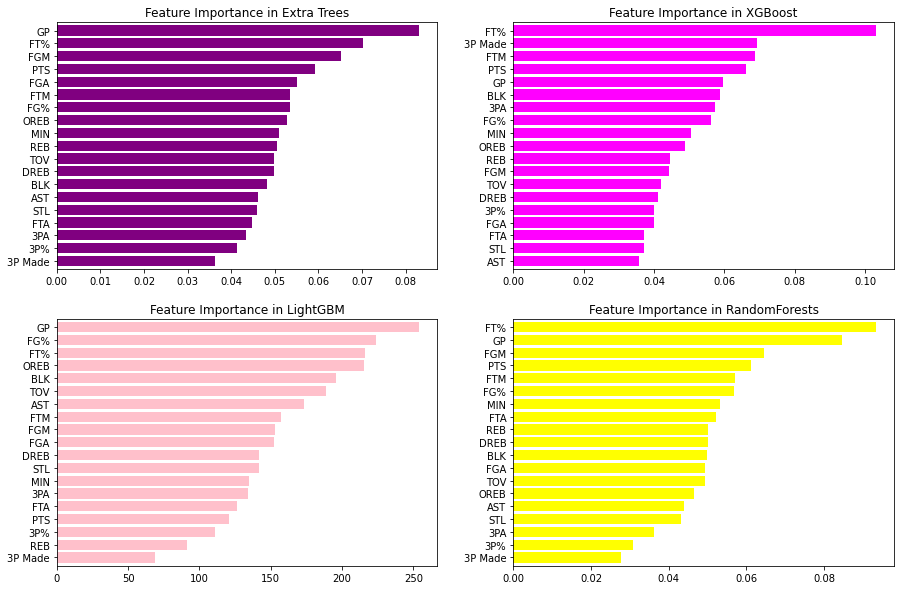

In [9]:
f,ax =plt.subplots(2,2, figsize = (15,10))

pd.Series(extra_model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#800080',ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Extra Trees')
pd.Series(xgb_model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#FF00FF',ax=ax[0,1])
ax[0,1].set_title('Feature Importance in XGBoost')
pd.Series(lgbm_model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#FFC0CB',ax=ax[1,0])
ax[1,0].set_title('Feature Importance in LightGBM')
pd.Series(randomforest_model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#FFFF00',ax=ax[1,1])
ax[1,1].set_title('Feature Importance in RandomForests')

### I'll continue with the "ExtraTrees" algorithm.
### Standard scaler is looks like better but normalize scaler is better than the standard at the submission. Why will I use scaler? Because It will be faster than the normal dataset.

In [85]:
extra_model = ExtraTreesClassifier(random_state=random_state).fit(X_train_normalize,y_train)

# SUBMISSION

In [86]:
y_preds = extra_model.predict(X_test_normalize)
y_preds = pd.DataFrame(y_preds, columns = ["prediction"])

In [87]:
y_preds

,prediction
0,0
1,0
2,0
3,0
4,1
...,...
550,1
551,1
552,1
553,0


In [88]:
y_preds.to_csv("submission_last_dphi.csv", index=False)